In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm

#preparing stuff
housingDataPath = os.path.join("data", "main.csv")
importedData = pd.read_csv(housingDataPath)

#splitting the data and preparing (step 4 c:)
#home type dropped cuz all the data is literally single family and there's no point in having it then
#lot area value dropped because half of them are 0
cleanedData = importedData.drop(["zpid", "zipcode", "streetAddress", "homeType"], axis=1)
cleanedData.dropna(inplace=True)

from sklearn.model_selection import train_test_split
x = cleanedData[['lotAreaValue', 'livingArea', 'bathrooms', 'bedrooms']]
y = cleanedData['price']
trainHousingX, testHousingX, trainHousingY, testHousingY = train_test_split(x, y, test_size=0.2, random_state=42)

print('Done with loading path')

Done with loading path


In [30]:
# Stuff to Do:

#1. Frame the problem [Done]
    # Create an ML model that can predict housing prices based on given parameters
#2. Get the data [Done]
    # Gathered data and scraped from zillow, check wuruhguhghg.py
    # Missing year built, couldn't get from zillow
#3. Explore the data [Done]
    # See below 
        #TLDR: Created a Corr matrix, a histogram, and a scatter matrix to view the graphs 
#4. Prepare the Data [Done]
    # See above
#5. Model the data [Done (Maybe?)]
    # See Below
        #TLDR - Created an SGD, SVR, and Polynomial Regression Model
#6. Fine tune the Model [Done (Maybe?)]
    # See Below
        #TLDR - Created a Gridsearch for each one
#7. Present the Solution [Done]
    # Temp
#8. Launch the ML system [Done]
    # Saved to a file, and probably will be loaded 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2793 entries, 0 to 2792
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   zpid           2747 non-null   float64
 1   streetAddress  2747 non-null   object 
 2   zipcode        2747 non-null   float64
 3   price          2747 non-null   float64
 4   bathrooms      2435 non-null   float64
 5   bedrooms       2384 non-null   float64
 6   livingArea     2379 non-null   float64
 7   homeType       2747 non-null   object 
 8   lotAreaValue   2725 non-null   float64
dtypes: float64(7), object(2)
memory usage: 196.5+ KB
None 


price                                  1.000000
livingArea                             0.719077
bathrooms                              0.527124
bedrooms                               0.387692
streetAddress_10115 SW Village Pkwy    0.355239
                                         ...   
homeType_TOWNHOUSE                    -0.044205
lotAreaValue

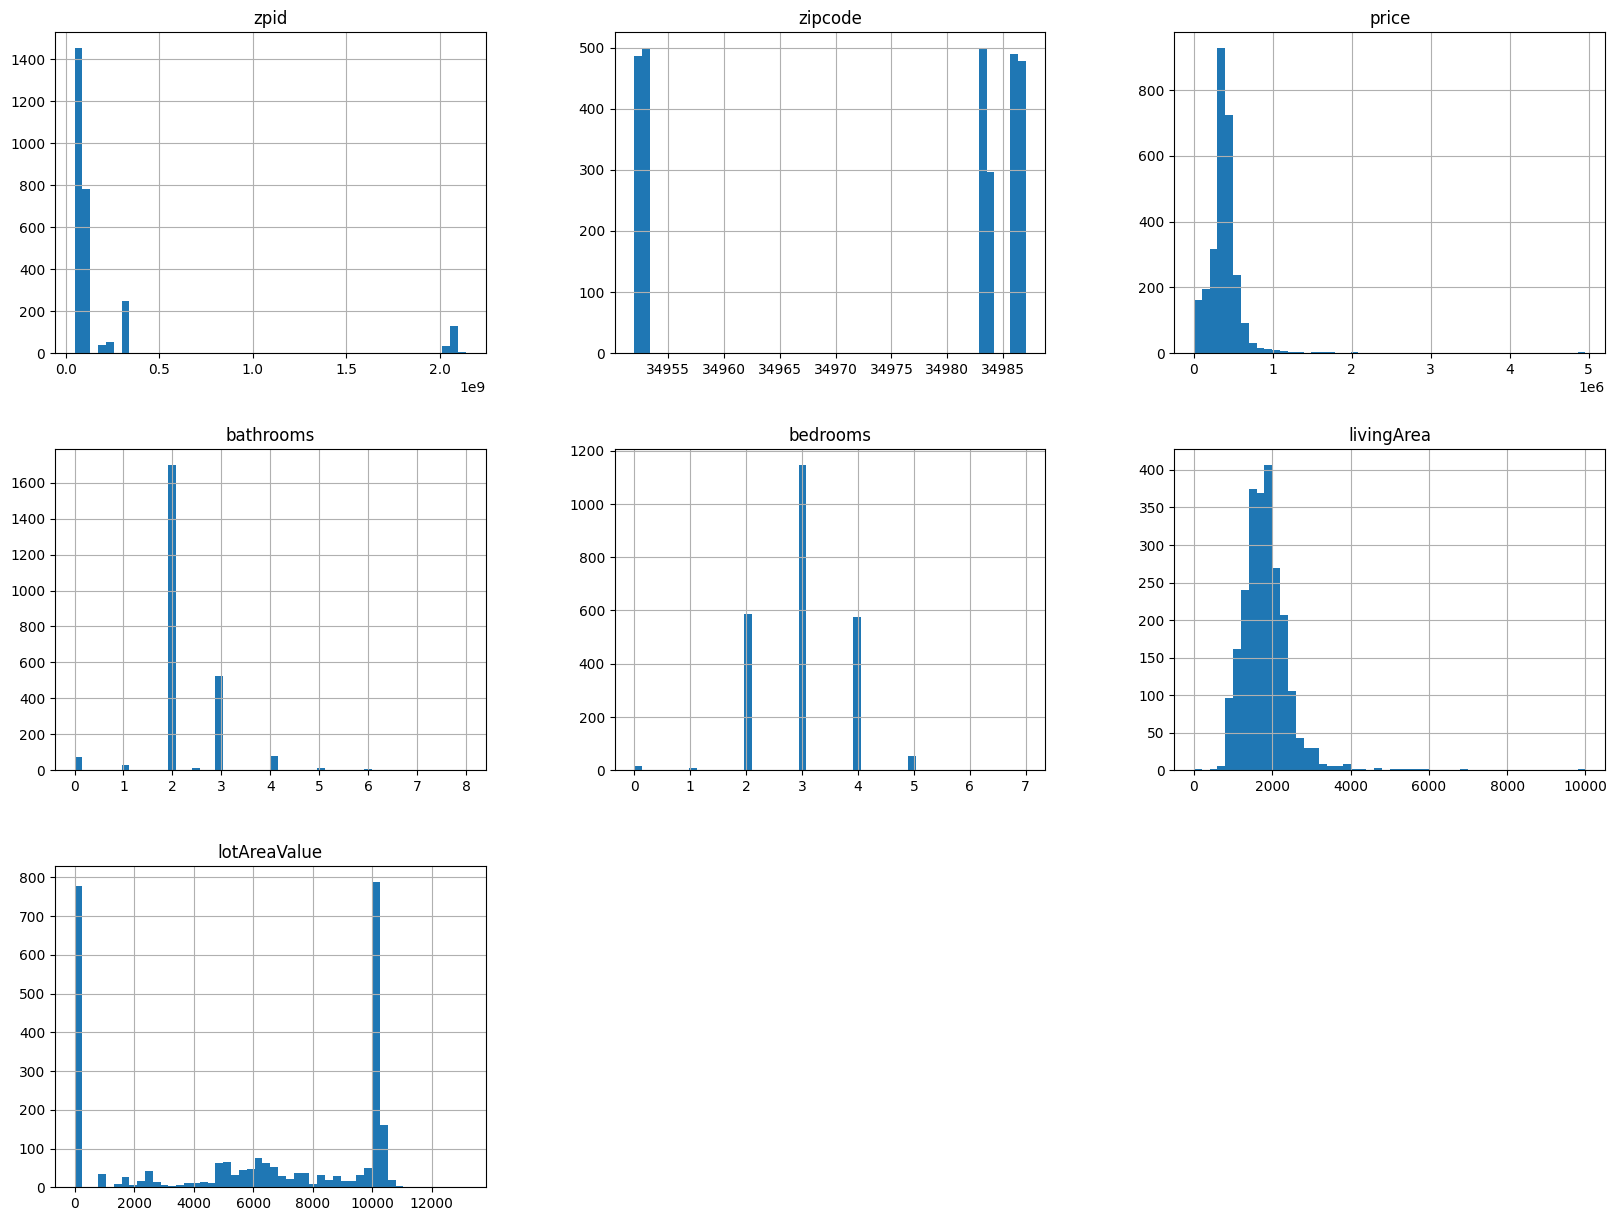

array([[<Axes: xlabel='price', ylabel='price'>,
        <Axes: xlabel='livingArea', ylabel='price'>,
        <Axes: xlabel='bathrooms', ylabel='price'>,
        <Axes: xlabel='bedrooms', ylabel='price'>,
        <Axes: xlabel='lotAreaValue', ylabel='price'>],
       [<Axes: xlabel='price', ylabel='livingArea'>,
        <Axes: xlabel='livingArea', ylabel='livingArea'>,
        <Axes: xlabel='bathrooms', ylabel='livingArea'>,
        <Axes: xlabel='bedrooms', ylabel='livingArea'>,
        <Axes: xlabel='lotAreaValue', ylabel='livingArea'>],
       [<Axes: xlabel='price', ylabel='bathrooms'>,
        <Axes: xlabel='livingArea', ylabel='bathrooms'>,
        <Axes: xlabel='bathrooms', ylabel='bathrooms'>,
        <Axes: xlabel='bedrooms', ylabel='bathrooms'>,
        <Axes: xlabel='lotAreaValue', ylabel='bathrooms'>],
       [<Axes: xlabel='price', ylabel='bedrooms'>,
        <Axes: xlabel='livingArea', ylabel='bedrooms'>,
        <Axes: xlabel='bathrooms', ylabel='bedrooms'>,
        <Axes

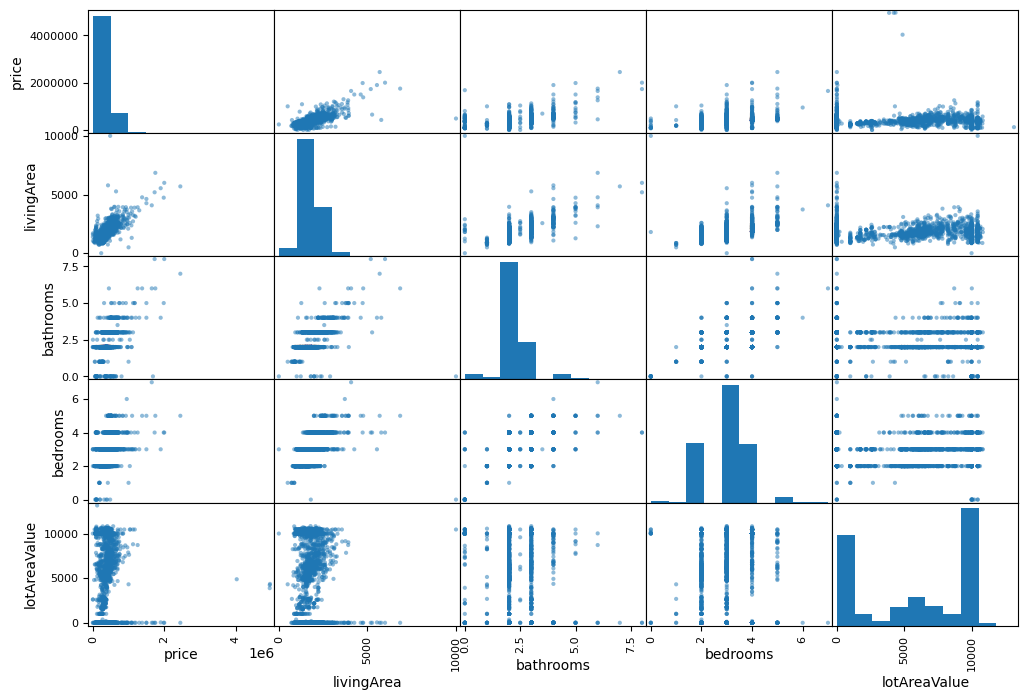

In [2]:
#. Exploring data c:
%matplotlib inline
import matplotlib.pyplot as plt

#info plz
print(importedData.info(), '\n\n')

#one hot encoding this stuff (i don't like it) idk
importedDataOneHotEncoded = pd.get_dummies(importedData)
importedDataCorr = importedDataOneHotEncoded.corr()
print(importedDataCorr["price"].sort_values(ascending = False), '\n\n')

#comment in and out as need be
print(importedData.head(), '\n\n')
#print(importedData.info(), '\n\n')

#histogram
importedData.hist(bins=50, figsize=(20,15))
plt.show()

from pandas.plotting import scatter_matrix
attributes = ["price", "livingArea", "bathrooms", "bedrooms", "lotAreaValue"]
plt.rcParams['axes.labelsize'] = 10
scatter_matrix(importedDataOneHotEncoded[attributes], figsize=(12, 8))

In [ ]:
#Relatively linear correlation between price living area, 
#not so much with bathrooms and bedrooms, but they do seem to have a central price

#lot area value half of it is 0 so i can't say for how useful it is
#I'll run two tests, one with and one without and see which one performs better

In [6]:
#model run with it
#implemented here c:
SVRHyperParameters = {
    'C': 10,
    'kernel': 'linear',
    'gamma': 'scale',
}
housingModel1 = SVR(**SVRHyperParameters)
housingModel1.fit(trainHousingX, trainHousingY)

housingPredictions = housingModel1.predict(testHousingX)
         
#accuracy check idk
model1MSE = mean_squared_error(testHousingY, housingPredictions)
model1RMSE = np.sqrt(model1MSE)
model1APE = np.abs((testHousingY - housingPredictions) / testHousingY) * 100
print('\nRMSE:', model1RMSE, '\n\nAPE:', model1APE, '\n\nAverage APE:', np.mean(model1APE))


RMSE: 131124.46332714517 

APE: 1703    10.492264
807     23.902056
2398     6.555235
1002     7.837643
2285    18.351355
          ...    
369     12.273200
2663     5.524678
429     65.713354
1029     6.495112
1881     5.131845
Name: price, Length: 470, dtype: float64 

Average APE: 23.36966634598111


In [5]:
from sklearn.svm import SVR
#i'll readd 0.001, 100, C, 100, 0.001 gamma later if I feel like it 
parameterGrid = {
    'C': [0.01, 0.1, 1, 10],
    'kernel': ['linear'],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'degree': [1, 2, 3]
}
#degree should stay relatively linear, Kernel should be linear likewise

tempModel = SVR()
grid_search = GridSearchCV(estimator=tempModel, param_grid=parameterGrid, scoring='neg_mean_squared_error', cv=5)

totalIterations = len(grid_search.param_grid['C']) * len(grid_search.param_grid['kernel']) * len(grid_search.param_grid['gamma']) * len(grid_search.param_grid['degree'])

#I like wait bar
with tqdm(total=totalIterations) as pbar:
    grid_search.fit(trainHousingX, trainHousingY)
    
    bestParameters = grid_search.best_params_
    bestModel = grid_search.best_estimator_
    housingPredictions = bestModel.predict(testHousingX)

    # Calculate RMSE and APE with the best model
    model1MSE = mean_squared_error(testHousingY, housingPredictions)
    model1RMSE = np.sqrt(model1MSE)
    model1APE = np.abs((testHousingY - housingPredictions) / testHousingY) * 100

    #progress bar
    pbar.update(totalIterations - pbar.n)

# After the grid search is done, print the results
print('Best Hyperparameters:', bestParameters)
print('Best RMSE:', model1RMSE)
print('Best APE:', model1APE, '\n\n')

print('Done')

100%|██████████████████████████████████████████████████| 60/60 [10:28<00:00, 10.47s/it]

Best Hyperparameters: {'C': 10, 'degree': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best RMSE: 131124.46332714517
Best APE: 1703    10.492264
807     23.902056
2398     6.555235
1002     7.837643
2285    18.351355
          ...    
369     12.273200
2663     5.524678
429     65.713354
1029     6.495112
1881     5.131845
Name: price, Length: 470, dtype: float64 


Done


In [ ]:
#overall, SVR isn't that good, I might consider a different model, Linear probably isn't that good either c: 
#might add another parameter

In [10]:
#polynomial regression because why not c: 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import joblib

polyCount = PolynomialFeatures(degree=2)
trainXPolyCount = polyCount.fit_transform(trainHousingX)
testXPoly = polyCount.transform(testHousingX)
polyCount.fit(trainXPolyCount, trainHousingY)

#i could finetune this, but I only need to run through like 1-5 models so I'll do it by hand (THIS IS BAD PRACTICE)
housingModel2 = LinearRegression()
housingModel2.fit(trainXPolyCount, trainHousingY)
housingPredictions2 = housingModel2.predict(testXPoly)
         
#accuracy check idk
model2MSE = mean_squared_error(testHousingY, housingPredictions2)
model2RMSE = np.sqrt(model2MSE)
model2APE = np.abs((testHousingY - housingPredictions2) / testHousingY) * 100
print('\nRMSE:', model2RMSE, '\n\nAPE:', model2APE, '\n\nAverage APE:', np.mean(model2APE))

joblib.dump(housingModel2, 'polyReg.pkl')


RMSE: 105811.35734740569 

APE: 1703     8.762728
807     22.540072
2398     9.463386
1002     9.336403
2285    16.324889
          ...    
369      4.164151
2663     0.535168
429     64.778143
1029     6.147698
1881     1.519818
Name: price, Length: 470, dtype: float64 

Average APE: 21.63562526916535


['polyReg.pkl']

In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('polyFit', PolynomialFeatures()),
    ('regressionFit', LinearRegression()) 
])

#param grid
parameterGrid = {
    'polyFit__degree': [1, 2, 3, 4, 5, 6, 7],    
}

grid_search = GridSearchCV(pipe, param_grid=parameterGrid, scoring='neg_mean_squared_error', cv=5)

totalIterations = len(grid_search.param_grid['polyFit__degree'])
with tqdm(total=totalIterations) as pbar:
    grid_search.fit(trainHousingX, trainHousingY)
    
    bestParameters = grid_search.best_params_
    bestModel = grid_search.best_estimator_
    housingPredictions = bestModel.predict(testHousingX)
    
    model2MSE = mean_squared_error(testHousingY, housingPredictions)
    model2RMSE = np.sqrt(model2MSE)
    model2APE = np.abs((testHousingY - housingPredictions) / testHousingY) * 100

    pbar.update(totalIterations - pbar.n)

print('Best Hyperparameters:', bestParameters)
print('Best RMSE:', model2RMSE)
print('Best APE:', model2APE, '\n\n')

print('Done')

100%|████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.15it/s]

Best Hyperparameters: {'polyFit__degree': 2}
Best RMSE: 105811.35734740569
Best APE: 1703     8.762728
807     22.540072
2398     9.463386
1002     9.336403
2285    16.324889
          ...    
369      4.164151
2663     0.535168
429     64.778143
1029     6.147698
1881     1.519818
Name: price, Length: 470, dtype: float64 


Done


In [20]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Define hyperparameters for SGDRegressor
SGDHyperParameters = {
    'alpha': 0.0001,
    'loss': 'huber',  
    'max_iter': 2000,  
    'tol': 1e-10, 
    'random_state': 42 
}

housingModel3 = SGDRegressor(**SGDHyperParameters)
housingModel3.fit(trainHousingX, trainHousingY)
housingPredictions3 = housingModel3.predict(testHousingX)

model3MSE = mean_squared_error(testHousingY, housingPredictions3)
model3RMSE = np.sqrt(model3MSE)
model3APE = np.abs((testHousingY - housingPredictions) / testHousingY) * 100
averageAPE = np.mean(model3APE)

print('\nRMSE:', model3RMSE, '\n\nAPE:', model3APE, '\n\nAverage APE:', averageAPE)



RMSE: 135241.38598015028 

APE: 1703    21.074830
807     22.608366
2398     9.751028
1002     8.471350
2285     9.596411
          ...    
369     10.016420
2663    10.400749
429     53.982122
1029     1.989322
1881     4.904795
Name: price, Length: 470, dtype: float64 

Average APE: 23.25075867817331


In [17]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np
from tqdm import tqdm

# Define the parameter grid for grid search
parameterGrid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'loss': ['huber', 'epsilon_insensitive'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'max_iter': [1000, 2000, 3000, 5000, 10000, 15000],
    'tol': [1e-5, 1e-4, 1e-3, 1e-2]
}

tempModel = SGDRegressor()
grid_search = GridSearchCV(estimator=tempModel, param_grid=parameterGrid, scoring='neg_mean_squared_error', cv=5)
totalIterations = len(grid_search.param_grid['alpha']) * len(grid_search.param_grid['loss']) * len(grid_search.param_grid['penalty']) * len(grid_search.param_grid['max_iter']) * len(grid_search.param_grid['tol'])

with tqdm(total=totalIterations) as pbar:
    grid_search.fit(trainHousingX, trainHousingY)
    
    bestParameters = grid_search.best_params_
    bestModel = grid_search.best_estimator_
    housingPredictions = bestModel.predict(testHousingX)
    
    modelRMSE = np.sqrt(mean_squared_error(testHousingY, housingPredictions))
    modelAPE = np.abs((testHousingY - housingPredictions) / testHousingY) * 100

    pbar.update(totalIterations - pbar.n)

print('Best Hyperparameters:', bestParameters)
print('Best RMSE:', modelRMSE)
print('Best APE:', modelAPE, '\n\n')

print('Done')


100%|███████████████████████████████████████| 576/576 [00:35<00:00, 16.01it/s]

Best Hyperparameters: {'alpha': 0.0001, 'loss': 'huber', 'max_iter': 2000, 'penalty': 'l1', 'tol': 1e-05}
Best RMSE: 135158.69653678776
Best APE: 1703    20.367962
807     22.715381
2398     9.552914
1002     7.943572
2285     9.697654
          ...    
369     10.510126
2663    10.046167
429     54.207124
1029     2.536528
1881     5.220884
Name: price, Length: 470, dtype: float64 


Done


In [1]:
import joblib
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# # Manually input values
lotAreaValue = 1000.0
livingArea = 1000.0
bathrooms = 1.0
bedrooms = 3.0

def polyPredictor(lotAreaValue, livingArea, bathrooms, bedrooms):
    polyModel = joblib.load("polyReg.pkl")

    inputData = {
        'lotAreaValue': [lotAreaValue],
        'livingArea': [livingArea],
        'bathrooms': [bathrooms],
        'bedrooms': [bedrooms]
    }

    inputDF = pd.DataFrame(inputData)
    polyCount = PolynomialFeatures(degree=2)
    testPoly = polyCount.fit_transform(inputDF)
    predicted_value = polyModel.predict(testPoly)
    
    print('Predicted Value:', predicted_value[0])

polyPredictor(lotAreaValue, livingArea, bathrooms, bedrooms)


Predicted Value: 284548.96225367853
